<a href="https://colab.research.google.com/github/whtan88/RandomDataAnalyst_DataAnalysis/blob/main/Credit_Scorecard_walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
!pip install scorecardpy
import scorecardpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# help function to check scorecard
help(sc.scorecard_ply)

Help on function scorecard_ply in module scorecardpy.scorecard:

scorecard_ply(dt, card, only_total_score=True, print_step=0, replace_blank_na=True, var_kp=None)
    Score Transformation
    ------
    `scorecard_ply` calculates credit score using the results from `scorecard`.

    Params
    ------
    dt: Original data
    card: Scorecard generated from `scorecard`.
    only_total_score: Logical, default is TRUE. If it is TRUE, then
      the output includes only total credit score; Otherwise, if it
      is FALSE, the output includes both total and each variable's
      credit score.
    print_step: A non-negative integer. Default is 1. If print_step>0,
      print variable names by each print_step-th iteration. If
      print_step=0, no message is print.
    replace_blank_na: Logical. Replace blank values with NA. Defaults to True.
      This parameter should be the same with woebin's.
    var_kp: Name of force kept variables, such as id column. Defaults to None.

    Return
    --

[INFO] filtering variables ...
[INFO] creating woe binning ...
[INFO] converting into woe values ...


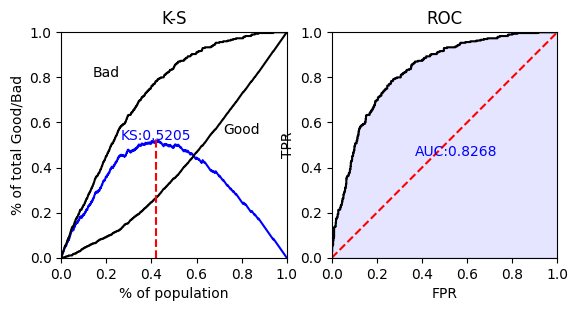

{'KS': np.float64(0.5205),
 'AUC': np.float64(0.8268),
 'Gini': np.float64(0.6535),
 'pic': <Figure size 640x480 with 2 Axes>}

In [ ]:
# load german credit data available within scorecardpy library
dat = sc.germancredit()

# apply variable filter
dt_sel = sc.var_filter(dat, y='creditability')

# split into woe bins
bins = sc.woebin(dt_sel, y='creditability')

# apply woe bins to dataset
dt_woe = sc.woebin_ply(dt_sel, bins)

y = dt_woe.loc[:,'creditability']
X = dt_woe.loc[:,dt_woe.columns != 'creditability']

# logistic regression model
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga')
lr.fit(X, y)

# predicted proability
dt_pred = lr.predict_proba(X)[:,1]

# evaluate performance
sc.perf_eva(y, dt_pred)

In [ ]:
# scorecard
card = sc.scorecard(bins, lr, X.columns)

# concatenate card to display
scorecard_df = pd.concat(card.values())
scorecard_df

,variable,bin,points
0,basepoints,NaN,448.0
0,savings_account_and_bonds,... < 100 DM,-15.0
1,savings_account_and_bonds,100 <= ... < 500 DM,-8.0
2,savings_account_and_bonds,"500 <= ... < 1000 DM%,%... >= 1000 DM%,%unknow...",43.0
3,housing,rent,-13.0
4,housing,own,6.0
5,housing,for free,-15.0
6,purpose,"retraining%,%car (used)",54.0
7,purpose,radio/television,27.0
8,purpose,"furniture/equipment%,%domestic appliances%,%bu...",-19.0


In [ ]:
# credit score
dt_sel['score'] = sc.scorecard_ply(dt_sel, card)
dt_sel.head()

,purpose,credit_amount,other_installment_plans,housing,credit_history,age_in_years,savings_account_and_bonds,present_employment_since,installment_rate_in_percentage_of_disposable_income,property,status_of_existing_checking_account,duration_in_month,other_debtors_or_guarantors,creditability,score
0,radio/television,1169,none,own,critical account/ other credits existing (not ...,67,unknown/ no savings account,... >= 7 years,4,real estate,... < 0 DM,6,none,0,600.0
1,radio/television,5951,none,own,existing credits paid back duly till now,22,... < 100 DM,1 <= ... < 4 years,2,real estate,0 <= ... < 200 DM,48,none,1,356.0
2,education,2096,none,own,critical account/ other credits existing (not ...,49,... < 100 DM,4 <= ... < 7 years,2,real estate,no checking account,12,none,0,615.0
3,furniture/equipment,7882,none,for free,existing credits paid back duly till now,45,... < 100 DM,4 <= ... < 7 years,2,building society savings agreement/ life insur...,... < 0 DM,42,guarantor,0,414.0
4,car (new),4870,none,for free,delay in paying off in the past,53,... < 100 DM,1 <= ... < 4 years,3,unknown / no property,... < 0 DM,24,none,1,343.0


<Axes: xlabel='score', ylabel='Count'>

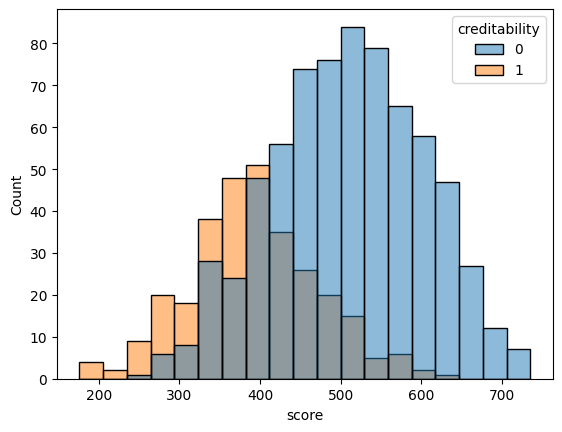

In [ ]:
# histogram plot of scorecard
sns.histplot(data=dt_sel, x='score', hue='creditability')

In [ ]:
# summary information values
ivs = dict((col, bins[col].loc[0,'total_iv']) for col in bins)
iv_df = pd.DataFrame.from_dict({'feature' : list(ivs.keys()), 'iv' : list(ivs.values())}).sort_values(by='iv', ascending=False)
top_5_feats = iv_df.sort_values(by='iv', ascending=False)['feature'].head(5)
iv_df.head(5)

,feature,iv
10,status_of_existing_checking_account,0.639372
5,credit_history,0.291830
11,duration_in_month,0.282618
0,savings_account_and_bonds,0.190974
3,credit_amount,0.181220


{'status_of_existing_checking_account': <Figure size 640x480 with 2 Axes>,
 'credit_history': <Figure size 640x480 with 2 Axes>,
 'duration_in_month': <Figure size 640x480 with 2 Axes>,
 'savings_account_and_bonds': <Figure size 640x480 with 2 Axes>,
 'credit_amount': <Figure size 640x480 with 2 Axes>}

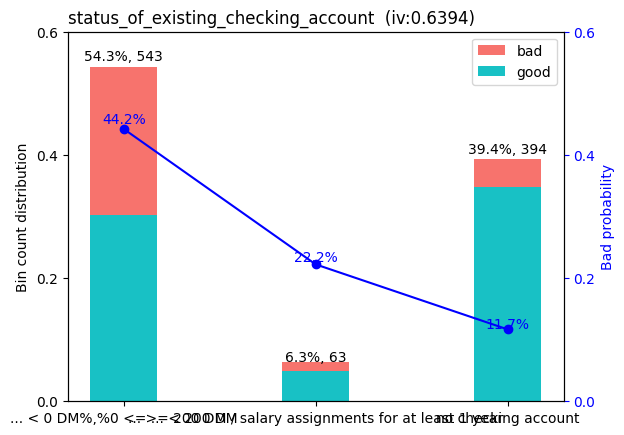

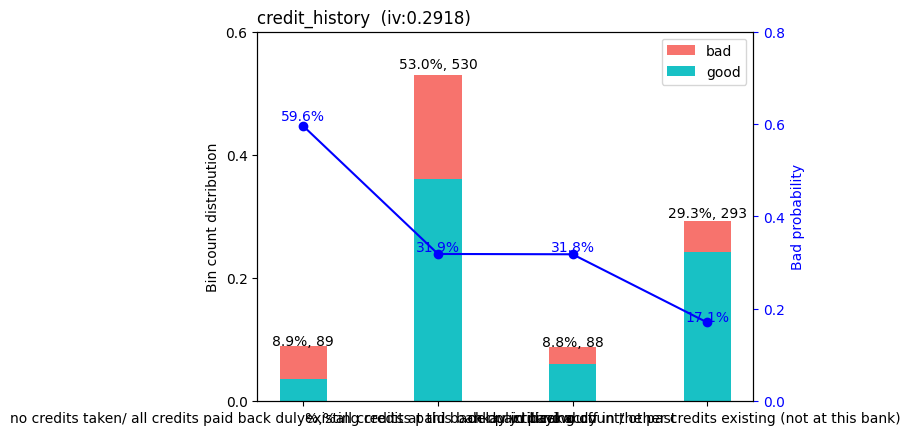

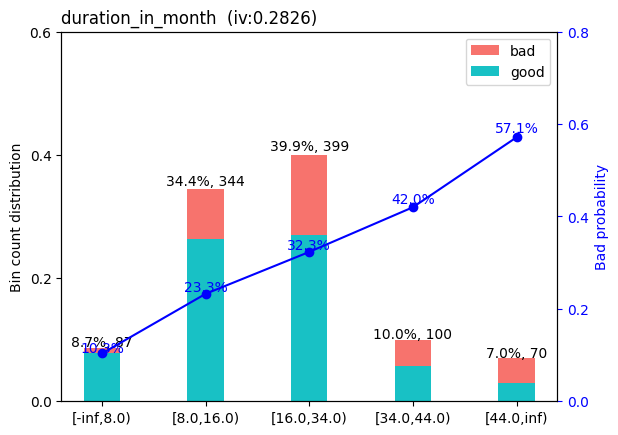

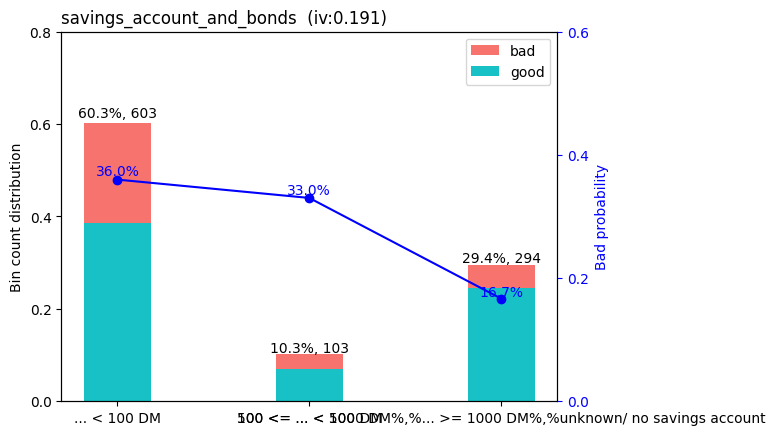

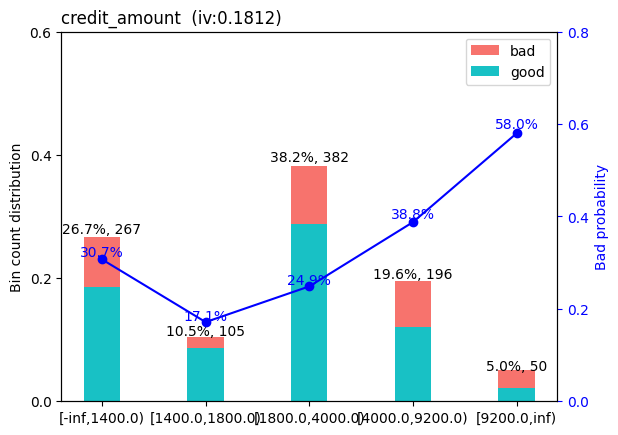

In [ ]:
# Plot woebin for visualization
sc.woebin_plot(bins, top_5_feats)

In [ ]:
# credit score for both total and each variable
score2 = sc.scorecard_ply(dt_sel, card, only_total_score = False)

score2.head()

,savings_account_and_bonds_points,housing_points,purpose_points,credit_amount_points,other_installment_plans_points,credit_history_points,present_employment_since_points,installment_rate_in_percentage_of_disposable_income_points,age_in_years_points,property_points,status_of_existing_checking_account_points,duration_in_month_points,other_debtors_or_guarantors_points,score
0,43.0,6.0,27.0,-2.0,5.0,35.0,10.0,-19.0,11.0,9.0,-34.0,63.0,-2.0,600.0
1,-15.0,6.0,27.0,-23.0,5.0,-4.0,-1.0,23.0,-28.0,9.0,-34.0,-55.0,-2.0,356.0
2,-15.0,6.0,-19.0,15.0,5.0,35.0,17.0,23.0,11.0,9.0,65.0,17.0,-2.0,615.0
3,-15.0,-15.0,-19.0,-23.0,5.0,-4.0,17.0,23.0,11.0,-1.0,-34.0,-25.0,46.0,414.0
4,-15.0,-15.0,-19.0,-23.0,5.0,-4.0,-1.0,8.0,11.0,-11.0,-34.0,-5.0,-2.0,343.0


In [ ]:
# sample data for comparison to scorecard
score2.iloc[0]

,0
savings_account_and_bonds_points,43.0
housing_points,6.0
purpose_points,27.0
credit_amount_points,-2.0
other_installment_plans_points,5.0
credit_history_points,35.0
present_employment_since_points,10.0
installment_rate_in_percentage_of_disposable_income_points,-19.0
age_in_years_points,11.0
property_points,9.0


In [ ]:
# check calculation for the final score
448+score2.iloc[0].sum()-score2.iloc[0]['score'] == score2.iloc[0]['score']

np.True_